## EAS 503 Homework 1 Submission
Name - Freya Genesis D Mello

**Make sure that you rename the notebook file to *replacewithubitname*_eas503_hw1.ipynb**


### Submission Details
* **Due Date** - September 25, 2018 by 11:59 PM EST. All assignments have to be submitted using UBLearns.
* **Number of Problems** - 4
* **Maximum points** - 50
* **Collaboration policy**
 - Every student has to submit individual homeworks
 - Any collaboration, in the form of discussion, with other members of the class is permitted, as long as the names of the collaborating members are explicitly stated on top of the submitted homework.
 - Any overlap with another submission or material from Internet will be awarded an F.
* **Late submission policy** - _No late submissions allowed_
* **Submission Format** - Enter code for each problem in the appropriate cell below. You may use multiple cells for a single problem to improve readability.
* **Testing Protocol** - To grade, we will simply execute your notebook from command line using the following command:
```shell
jupyter nbconvert --execute <notebook>
```
Please make sure that your notebook produces the desired output with the above command, before submitting.

### Problem 1 - Testing for  Fibonacci Number (10 Points)
Develop functions to handle [Fibonacci numbers](http://mathworld.wolfram.com/FibonacciNumber.html). Try to design the quickest possible algorithm and record the time taken for the code to run.

Test if a number belongs to the Fibonacci series, using `if-else` conditions. The logic of testing if a number, $n$, belongs to the Fibonacci series is: if one or both of $(5*n^2 + 4)$ or $(5*n^2 – 4)$ is a perfect square.

Here is what you need to do:
1. You will need to implement the function `fibonacciGenerator`, which takes no inputs. The function should return a Python `list` of length 25, with first 25 Fibonacci numbers.
2. You will need to define a function `fibonacciTester`, which takes a single number as input, and returns `true` if the number belongs to the Fibonacci series, and `false` otherwise. 

In [17]:
# function to generate the fibonacci series
def fibonacciGenerator():
    fibo_list = []
    for i in range(0, 25):
        if i == 0:
            fibo_list.append(0)
        elif i == 1:
            fibo_list.append(1)
        else:
            fibo_list.append((i-1) + (i-2))
    return fibo_list
        
import time
st = time.time()
l = fibonacciGenerator()
print(l)
en = time.time()
print("The code took %d seconds."%(en - st))

[0, 1, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45]
The code took 0 seconds.


In [20]:
def fibonacciTester(n):
    pow_add = math.sqrt((5*math.pow(n, 2))+4)
    pow_sub = math.sqrt((5*math.pow(n, 2))-4)
    if pow_add == round(pow_add) or pow_sub == round(pow_sub):
        return n, True
    else:
        return n, False

import time
import math
st = time.time()
for i in range(1,21):
    vals = fibonacciTester(i)
    print(vals)
en = time.time()
print("The code took %d seconds."%(en - st))

(1, True)
(2, True)
(3, True)
(4, False)
(5, True)
(6, False)
(7, False)
(8, True)
(9, False)
(10, False)
(11, False)
(12, False)
(13, True)
(14, False)
(15, False)
(16, False)
(17, False)
(18, False)
(19, False)
(20, False)
The code took 0 seconds.


### Problem 2 - Handling Exceptions (10 Points)
In this problem you will read from a text file (**data_p2.txt**) included in the assignment. Please download it and store it in the same directory as this notebook. The code for reading data from the file is given below. You need to store the data and perform a simple mathematical operation on each data point. Each line is _supposed_ to contain a floating point number. But what you will observe is that some lines might have erroneous entries. You need to ignore those lines (Hint: Use `Exception` handling). 

The idea is to implement a function, `computeMedian()`, which reads in a file and computes the median of the numbers and returns the output. You may use the inbuilt function `sort` when computing the median.

_DO NOT USE ANY INBUILT OR OTHER FUNCTION TO DIRECTLY COMPUTE MEDIAN_

In [21]:
def dummyFileReader():
    with open('data_p2.txt','r') as f: #we open the file in 'read' mode. The 'with' clause is similar to 'finally' clause
        for line in f: #iterate over the file line by line
            s = line.strip() #strip() removes the endline character at the end of the line. Line is of type 'str' 
            try:
                mylist.append(float(s))
            except ValueError:
                pass
    return mylist

In [22]:
def computeMedian():
    mylist = dummyFileReader()
    mylist.sort()
    n = len(mylist)
    if n % 2 == 0:
        # if the list contains even number of values
        return (mylist[n / 2] + mylist[n / 2 - 1]) / 2.0
    # if list contains odd number of values
    return mylist[n/2]
    
mylist = []
# printing the median
print(computeMedian())


0.499675


Answer:
    
   Using Exception handling, a package specific to the type of error caught here is "Value Error" as the file coontains values other than float. 
   The computed median is 0.499675 on invoking the computeMedian() function.

### Problem 3 - Benchmarking Dictionary Performance (10 Points)
We want to check the peformance of the Python inbuilt `del` routine for dropping elements from a dictionary. The question that we want answer for is: 
_Does the time required to delete an element from a Python dictionary depend on the size of the dictionary and on the location of the target element?_

In each step of the experiment do the following: 
- Create a dictionary of integers from 1 to N, with your own desired keys. 
- Within a loop, delete the $i^{th}$ element. Measure the time taken to delete the element (Hint: use the `time` package in Python).

Conduct the above experiment for $N = 1,000,000$ and $i$ ranging from $1$ to $1,000,000$ in steps of $10,000$. Make sure that you are recreating the Python dictionary every time. Save the times in a list (let us name it `timeMillion`).

Repeat the above experiment, but set $N = 10,000,000$. This time, vary $i$ from $1$ to $10,000,000$ in steps of $100,000$. Save the times for this experiment in another list, say, `time10Million`.

Plot the two lists using the `matplotlib.pyplot` package. See below for a sample code. You can plot both lists in the same chart to compare.

Using the plots, answer the following (create a markup cell after your code cell(s) and enter your responses):
1. Does the cost of deleting an element depend on the dictionary size?
2. Does the cost of deleting an element depend on the location of the deleted element?



In [54]:
# This cell is only for demonstration purposes, you can reuse parts of this code to create your own plots
# Using matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline 
# above line is needed to make sure that the plots are displayed in the notebook.

#generate some dummy data
x = list(range(0, 20)) # generate a list
y = [x1**2+2*x1 for x1 in x] # create a new list using the original list. Note the Pythonic inline creation of lists.
y1 = [x1**2.3 for x1 in x]
plt.plot(x,y)
plt.plot(x,y1)

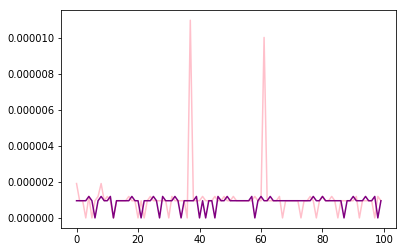

In [27]:
import matplotlib.pyplot as plt
import time
import numpy as np
    
%matplotlib inline 

# function to delete the kth element
def del_element(dicts, k):
    import time
    st = time.time()
    #code to delete the kth element
    del dicts[k]
    en = time.time()
    return (en - st)

dict_mill = {}
dict_10_mill = {}
dict_mill_copy = {}
dict_10_mill_copy = {}
res_mill = []
res_10_mill = []
vals = 0
t_vals = 0

for i in range(100):
    for j in range(10000):
        dict_mill[vals] = "key"+str(vals)
        vals+=1
        
vals = 0      

for i in range(1000):
    for j in range(10000):
        dict_10_mill[vals] = "key"+str(vals)
        vals+=1
        
N = 1000000

# recording execution time
for i in range(0, N, 10000):
    dict_mill_copy = dict_mill
    st = time.time()
    del dict_mill_copy[i]
    en = time.time()
    res_mill.append(en - st)

N = 10000000

for i in range(0, N, 100000):
    dict_10_mill_copy = dict_10_mill
    st = time.time()
    del dict_10_mill_copy[i]
    en = time.time()
    res_10_mill.append(en - st)

plt.plot(res_mill, color = "pink")
plt.plot(res_10_mill, color = "purple")
plt.show()

In [28]:
#using numpy library functions
print(np.mean(res_mill)) #dictionary of 1 million 
print(np.mean(res_10_mill)) #dictionary of 10 million

1.0800361633300782e-06
8.916854858398438e-07


Answer:
   On an average it takes 1.0800361633300782e-06 seconds to delete an element from the dictionary of 1million and 8.916854858398438e-07 from the dictionary of 10million.
    
   The cost of deleting the element does not depend on the dictionary size.
   The cost of deleting an element does not depend on the location of the deleted element, either. Each time the program is run, it is observed that the time taken to delete the elements keep changing based on its location in the dictionary and the processor load and speed.

## Problem 4 - The Two Envelopes Problem (20 Points)
The Two Envelopes problem is an interesting decision theory problem.

> Consider that you are given two indistinguishable envelopes, each containing money, one contains twice as much as the other. You may pick one envelope and keep the money it contains. Having chosen an envelope at will, but before inspecting it, you are given the chance to switch envelopes. Should you switch?

> The game is this: _stick_ or _switch_; It seems obvious that there is no point in switching envelopes as the situation is symmetric. However, because you stand to gain twice as much money if you switch while risking only a loss of half of what you currently have, it is possible to argue that it is more beneficial to switch.The problem is to show what is wrong with this argument.

**Two Envelopes problem**: Implement a function, called `simulateProblem()`, that does the game simulation for the two envelopes problem. Run the simulation 1000 times to figure out the empirical (observed) probability of gaining more money when switching and gaining more money when sticking to the original choice. Each simulation operates as follows:
1. First, randomly pick an envelopes configuration out of the two possible configurations, $(A,2A)$ or $(2A,A)$. In the first configuration, the second envelope has twice the money and in the second configuration, the first envelope has twice the money.
2. Next, randomly pick one of the two envelopes. 
3. Finally, randomly choose to either stick or switch. The program checks if you won (the envelope that picked has more money) or not (the envelope that picked has less money). In case of winning, record if the winning was because of _sticking_ or _switching_.

You can perform the _random_ choice as follows, using the `np.random.randint()` method.
```python
import numpy as np
print(np.random.randint(2))
```
The `simulateProblem()` function takes no arguments and returns two values, first is a boolean output which is `True` if you win and `False` if you lose. In case of a win, the second output is `True` if the win was due to _sticking_ and `False` if the win was due to _switching_.

Once the method `simulateProblem()` that does the above steps and returns _sticking_,or _switching_, depending on the win/loss scenario, run the method 1000 times and count the number of times the win was due to _sticking_ to the pick in Step 2, and number of times the win was due to _switching_ the envelope.

In [29]:
def simulateProblem():
    # Configurations (A,2A) or (2A,A)
    # Envelope A, 2A
    # STICK = TRUE
    # SWITCH = FALSE
    configuration = np.random.randint(2)
    envelope = np.random.randint(2)
    stick_or_switch = np.random.randint(2)
    if (configuration == 0):
        if(envelope == 0):
            if(stick_or_switch == 0):
                return False,True
            elif(stick_or_switch == 1):
                return True,False
        elif(envelope == 1):
            if(stick_or_switch == 0):
                return True,True
            elif(stick_or_switch == 1):
                return False,False
    elif(configuration == 1):
        if(envelope == 0):
            if(stick_or_switch == 0):
                return True,True
            elif(stick_or_switch == 1):
                return False,False
        elif(envelope == 1):
            if(stick_or_switch == 0):
                return False,True
            elif(stick_or_switch == 1):
                return True,False

import numpy as np
win_with_sticking = 0
win_with_switching = 0
for i in range(1000):
    wl,ss = simulateProblem()
    if(wl == True & ss == True):
        win_with_sticking = win_with_sticking + 1
    elif(wl == True & ss == False):
        win_with_switching = win_with_switching + 1
print("Won By Sticking %d"%win_with_sticking)
print("Won By Switching %d"%win_with_switching)


Won By Sticking 229
Won By Switching 259


### Which is better - sticking or switching?
Use the simulation results to figure out the right answer.

Answer:
    Each time the program is run, the number of wins by sticking or by switching keep varying so we cannot choose which is better.